###  HR analytics 

also known as __people analytics__, is a data-driven approach to manage people at work. Many problems in HR can be addressed by HR analytics, such as
 
 - Hiring/Assessment
 - Retention
 - Performance Evaluation
 - Learning and Developement
 - Collaboartion and Team Composition etc.

In this analysis we focus on the employee turnover which is related to first two bullet points.

#### Employee turnover

is the process of employess leaving the company, also known as __employee attrition__ or __employee churn__. Employee turnover 

 - May result in high costs for the company
 - May affect company's hiring or retention decisios

Research shows that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced [[ref](https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf)]. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets used to the new role. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance.

#### Dataset
The dataset can be downloaded from [kaggle](https://www.kaggle.com/lnvardanyan/hr-analytics).

#### Libraries

In [60]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Read "turnover.csv" and save it in a DataFrame called data
data = pd.read_csv("turnover.csv")

# Take a quick look to the first 5 rows of data
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### EDA

In [3]:
# Get some information on the types of variables in data
data.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

We have two columns of type object, sales and salary, which are actually categorical. Let's rename the column  “sales” to “department”, which is more meaningful:

In [4]:
data = data.rename(columns={'sales':'department'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Print the unique values of the "department" column
# nominal categorical variable: no order or rank
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


Let us combine 'technical', 'support' and 'IT' together and named it 'technical'

In [6]:
data['department']=np.where(data['department'] =='support', 'technical', data['department'])
data['department']=np.where(data['department'] =='IT', 'technical', data['department'])

In [7]:
#After the change, this is how the department categories look:
print(data.department.unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


In [8]:
# Print the unique values of the "salary" column
# ordinal categorical variable: follow some order
print(data.salary.unique())

['low' 'medium' 'high']


### Descriptive Statistics

In [9]:
# Use len() function to get the total number of observations and save it as the number of employees
n_employees = len(data)

# Print the number of employees who left/stayed
print(data.left.value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [10]:
# Print the percentage of employees who left/stayed
print(data.left.value_counts()/n_employees*100)

0    76.191746
1    23.808254
Name: left, dtype: float64


11,428 employees stayed, which accounts for about 76% of the total employee count. Similarly, 3,571 employees left, which accounts for about 24% of them.

In [11]:
#groupby by 'left column' 
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### Some Insights:

- The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
- The average monthly work hours of employees who left the company is more than that of the employees who stayed.
- The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
- The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [12]:
#group by the 'salary' column
data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


Interestingly, high salary employees got more promotion than those of medium and so on in past 5 years. 

### Data visualizations

Text(0, 0.5, 'Frequency of Turnover')

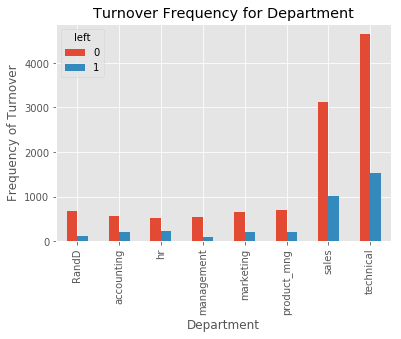

In [13]:
plt.style.use('ggplot')
pd.crosstab(data.department,data.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
#plt.savefig('department_bar_chart')

The frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good feature in model prediction.

Text(0, 0.5, 'Proportion of Employees')

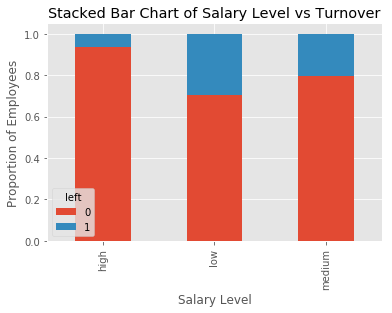

In [14]:
table = pd.crosstab(data.salary, data.left)
table.div(table.sum(1).astype(float), axis='rows').plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
#plt.savefig('salary_bar_chart')

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be also be a good predictor.

Histograms are often one of the most helpful tools in data visulization. Lets use seaborn pairplot to visualize the numerical features. By doing so, we can also visualize the correlation between different features.

Text(0, 0.5, 'Frequency')

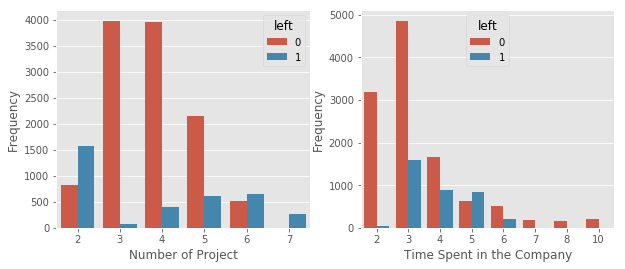

In [15]:
#features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','department','salary']
#fig=plt.subplots(figsize=(10,15))
#for i, j in enumerate(features):
#    plt.subplot(4, 2, i+1)
    #plt.subplots_adjust(hspace = 1.0)
#    sns.countplot(x=j,data = data)
#    plt.xticks(rotation=90)
    #plt.title("No. of employee")
fig=plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='number_project',data=data,hue='left')
plt.xlabel('Number of Project')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
sns.countplot(x='time_spend_company',data=data,hue='left')
plt.xlabel('Time Spent in the Company')
plt.ylabel('Frequency')

#### Some Insights

- The employee who had done 6 and 7 projects, left the company: it seems to like that they were overloaded with work.
- The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

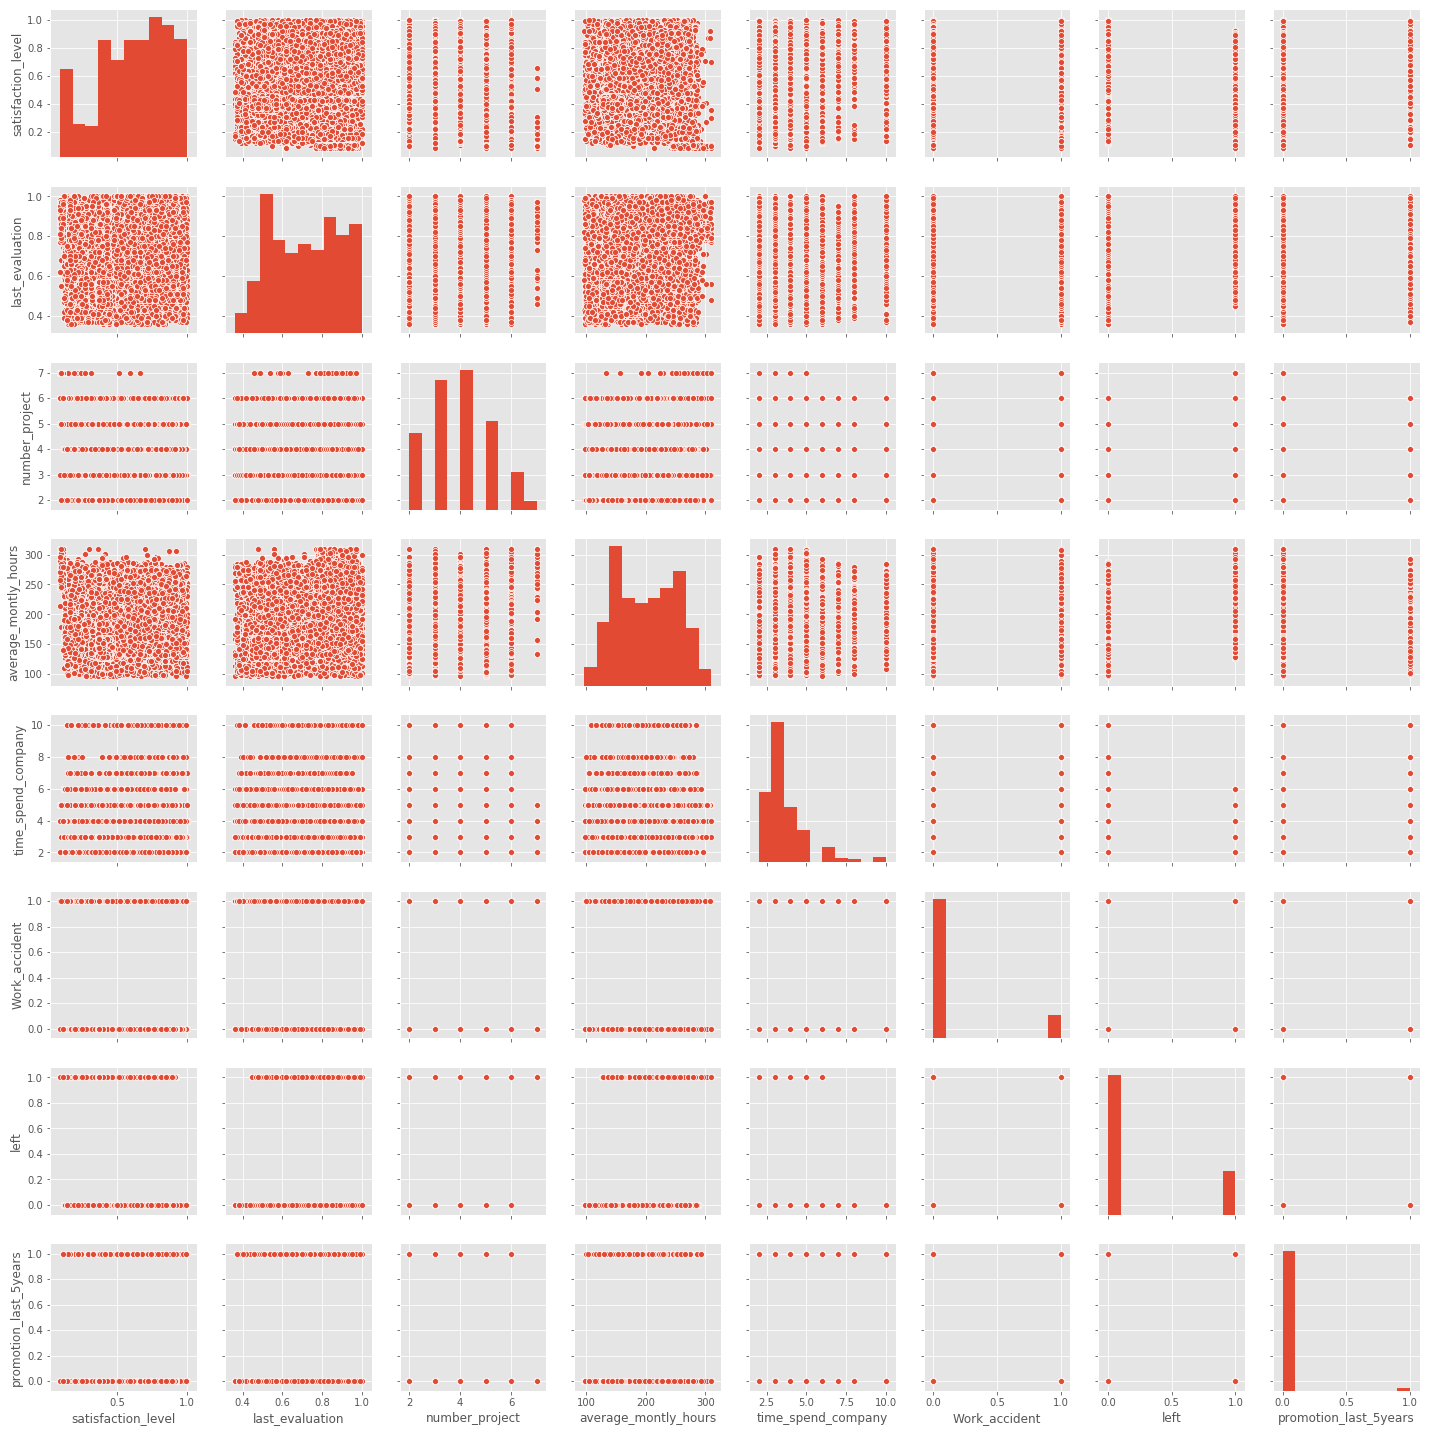

In [16]:
sns.pairplot(data)

Fatures are not correlated.

### Encoding categories/Pre-Processing Data

There are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [17]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

In [18]:
# Provide the correct order of categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

In [19]:
# Encode categories
data.salary = data.salary.cat.codes

In [20]:
data.salary.unique()

array([0, 1, 2])

Our salary column is now encoded as an ordered category, and optimized for our prediction algorithm.

In [21]:
# Get dummies and save them inside a new DataFrame
departments = pd.get_dummies(data.department)

# Take a quick look to the first 5 rows of the new DataFrame called departments
departments.head()

,RandD,accounting,hr,management,marketing,product_mng,sales,technical
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


There are 8 departments in the dataset, so we now get 8 columns. The first five rows in our dataset refer to people working in the sales department, so we get values equal to 1 in the sales column, and values equal to 0 in the others.

In [22]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis='columns')

In [23]:
# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis='columns')

# Join the new dataframe "departments" to your employee dataset: done
data = data.join(departments)

In [24]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,hr,management,marketing,product_mng,sales,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0


#### Separating Target and Features

In [25]:
# Choose the dependent variable column (churn) and set it as target
target = data.left

# Drop column churn and set everything else as features
features = data.drop("left",axis='columns')

In [27]:
# Use that function to create the splits both for target and for features
# Set the test sample to be 40% of your observations
target_train, target_test, features_train, features_test\
= train_test_split(target,features,test_size=0.4,random_state=42)

#### Fitting the Decision tree to employee data

In [28]:
# Initialize it and call model by specifying the random_state parameter
model_dt = DecisionTreeClassifier(random_state=42)

# Apply a decision tree model to fit features to the target
model_dt.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
# Check the accuracy score of the prediction for the training set
model_dt.score(features_train,target_train)*100

100.0

In [30]:
# Check the accuracy score of the prediction for the test set
model_dt.score(features_test,target_test)*100

97.26666666666667

As expected, our algorithm did perfectly on the training set. On the testing set, it was able to correctly predict if an employee would leave or not in about 97% of the cases! This implies the overfitting. 

In [33]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model_dt.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model_dt,"tree.dot")

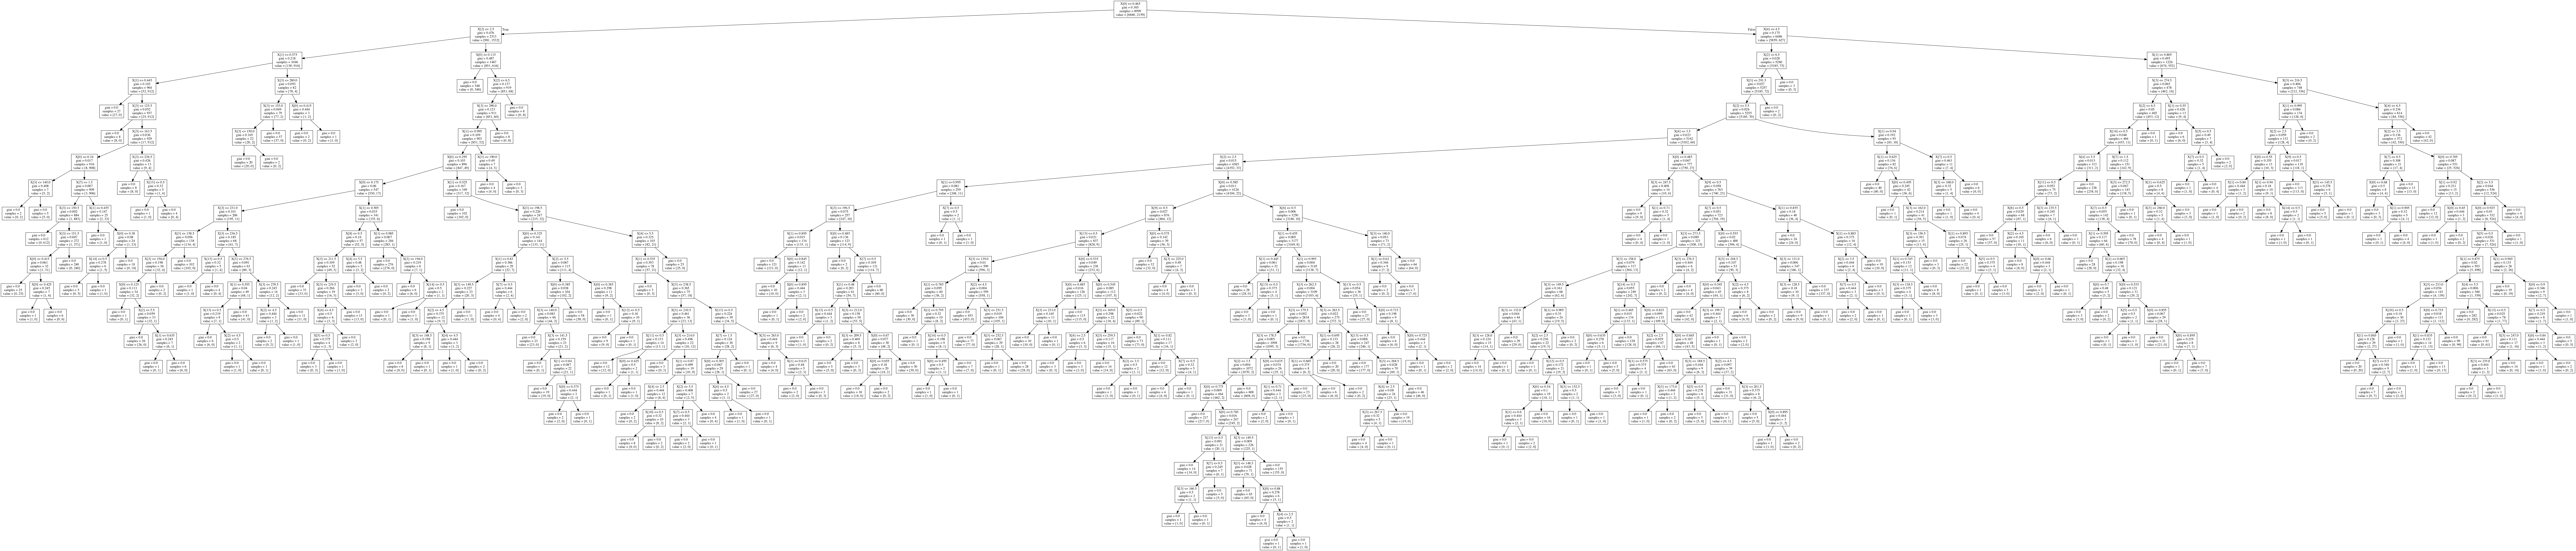

In [34]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

img = Image.open("tree.png")
draw = ImageDraw.Draw(img)

img.save('sample-out.png')
PImage("sample-out.png")

#### Hyperparameter tunning (as a solution of overfitting).

In [35]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [36]:
# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model_dt, parameters)

# fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

/Users/bilaspal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 6, 'min_samples_leaf': 50}


In [37]:
# Calculate feature importances
model_best = param_search.best_estimator_
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an indnex
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.563341
last_evaluation,0.149153
time_spend_company,0.138778
number_project,0.092117
average_montly_hours,0.056293
technical,0.000317
Work_accident,0.000000
promotion_last_5years,0.000000
salary,0.000000
RandD,0.000000


It seems that satisfaction is by far the most impactful feature on the decision to leave the company or not. There are some features with zero importance, let's not use this.

In [38]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]

In [39]:
selected_list

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company'],
      dtype='object')

In [40]:
# Initialize the best model using parameters provided in description
# as our target is imbalanced (not equal numbers of 0 and 1), we use 'balanced' class_weight
model_best_bal = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 50, class_weight = "balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best_bal.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best_bal.predict(features_test_selected)

In [41]:
# Print the general accuracy of the model_best
print(model_best_bal.score(features_train_selected, target_train) * 100)
print(model_best_bal.score(features_test_selected, target_test) * 100)

96.79964440493389
96.53333333333333


It seems work better than our old model. Let us look the confusion matrix.

Text(0.5, 1.0, 'Decision Tree')

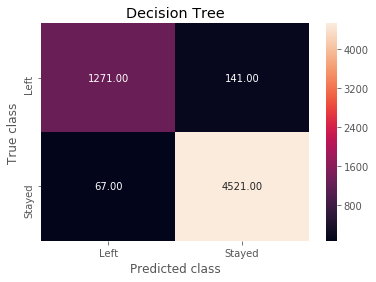

In [42]:
dt_cm = metrics.confusion_matrix(target_test, prediction_best, [1,0])
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree')
#plt.savefig('Decision_Tree')

In [43]:
print(classification_report(target_test, prediction_best))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4588
           1       0.95      0.90      0.92      1412

   micro avg       0.97      0.97      0.97      6000
   macro avg       0.96      0.94      0.95      6000
weighted avg       0.97      0.97      0.97      6000



In [45]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, prediction_best))
# Model Precision
print("Precision:",metrics.precision_score(target_test, prediction_best))
# Model Recall
print("Recall:",metrics.recall_score(target_test, prediction_best))

Accuracy: 0.9653333333333334
Precision: 0.9499252615844545
Recall: 0.9001416430594901


Well, we got a classification accuracy rate of 94%, considered as not too bad accuracy.

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our best model predicted an employee is going to leave, that employee actually left 83% of the time.

Recall: If there is an employee who left,  and our  model can identify it 91% of the time.

### Random Forest

In [46]:
rf = RandomForestClassifier()
rf.fit(features_train, target_train)

/Users/bilaspal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
print(classification_report(target_test, rf.predict(features_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4588
           1       0.99      0.94      0.97      1412

   micro avg       0.98      0.98      0.98      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Text(0.5, 1.0, 'Random Forest')

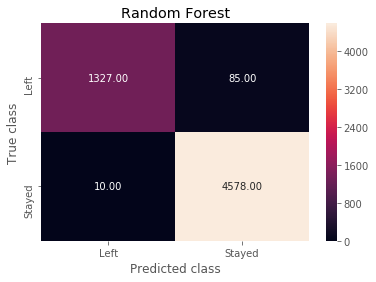

In [48]:
rf_cm = metrics.confusion_matrix(target_test, rf.predict(features_test), [1,0])
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
#plt.savefig('Decision_Tree')

In [49]:
# Model Accuracy, how often is the classifier correct in training set?
print("Training Accuracy:",metrics.accuracy_score(target_train, rf.predict(features_train)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, rf.predict(features_test)))
# Model Precision
print("Precision:",metrics.precision_score(target_test, rf.predict(features_test)))
# Model Recall
print("Recall:",metrics.recall_score(target_test, rf.predict(features_test)))

Training Accuracy: 0.9977775308367597
Accuracy: 0.9841666666666666
Precision: 0.9925205684367988
Recall: 0.9398016997167139


#### Tunning hyperparameters

In [50]:
# Define the dictionary 'params_rf'
params_rf = {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features':['log2','auto','sqrt'],
    'min_samples_leaf':[1, 2,10,30]
}

In [51]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(features_train, target_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/bilaspal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [1, 2, 10, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [52]:
# Extract the best estimator
best_model = grid_rf.best_params_
best_model

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50}

In [53]:
# Calculate feature importances
model_best = grid_rf.best_estimator_
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an indnex
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.321794
time_spend_company,0.177111
number_project,0.167713
average_montly_hours,0.163889
last_evaluation,0.124215
salary,0.014374
Work_accident,0.013636
technical,0.004120
sales,0.003007
promotion_last_5years,0.002394


In [54]:
print(classification_report(target_test, model_best.predict(features_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4588
           1       0.99      0.95      0.97      1412

   micro avg       0.99      0.99      0.99      6000
   macro avg       0.99      0.97      0.98      6000
weighted avg       0.99      0.99      0.99      6000



Text(0.5, 1.0, 'Random Forest')

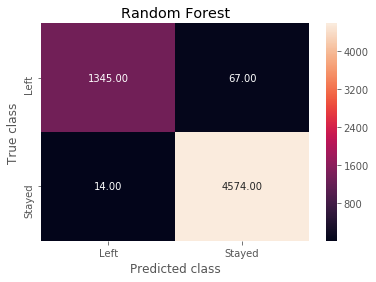

In [55]:
rf_cm = metrics.confusion_matrix(target_test, model_best.predict(features_test), [1,0])
sns.heatmap(rf_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
#plt.savefig('Decision_Tree')

In [314]:
# Model Accuracy, how often is the classifier correct in training set?
print("Training Accuracy:",metrics.accuracy_score(target_train, model_best.predict(features_train)))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, model_best.predict(features_test)))
# Model Precision
print("Precision:",metrics.precision_score(target_test, model_best.predict(features_test)))
# Model Recall
print("Recall:",metrics.recall_score(target_test, model_best.predict(features_test)))

Training Accuracy: 0.9997142585008096
Accuracy: 0.9864444444444445
Precision: 0.9884057971014493
Recall: 0.9542910447761194


Using a default Random Forest algoritm, we improve a lot compared to the best Decision Tree algorithm. Hyperparameter tunning does not help much. Performance is almost same as of default RF classifier. 

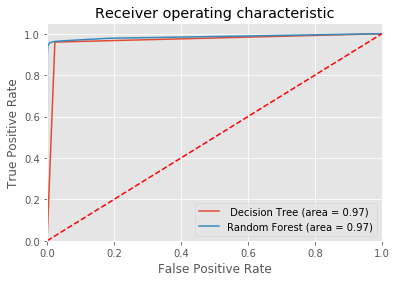

In [59]:
dt_roc_auc = roc_auc_score(target_test, model_dt.predict(features_test))
fpr, tpr, thresholds = roc_curve(target_test, model_dt.predict_proba(features_test)[:,1])
rf_roc_auc = roc_auc_score(target_test, rf.predict(features_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(target_test, rf.predict_proba(features_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=' Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

### Conclusions:

It seems, employee satisfiction level is the most important features which influence whether an employee will leave the company or not. Exactly! Using Random Forest algorithm we have shown that we can predict employee turnover with a good prediction rate. Although Random Forest is a good estimator in this case, my plan is to use Neural Network.